RAJA M

A project for an internship at 'The Sparks Foundation'

TASK 2 - Prediction Using Unsupervised ML

DOMAIN - Data Science and Business Analytics

BATCH - JUNE 2023

Importing Libaries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans as KMeans

Loading the Dataset

In [3]:
df = pd.read_csv("iris.csv",names=['Sepal Length','Sepal Width','Petal Length','Petal Width','Class'])
print(f'About the Dataset \n'
      f'Shape:{df.shape}\n'
      f'Size:{df.size}')
df.head()

About the Dataset 
Shape:(150, 5)
Size:750


,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Distribution of the Data

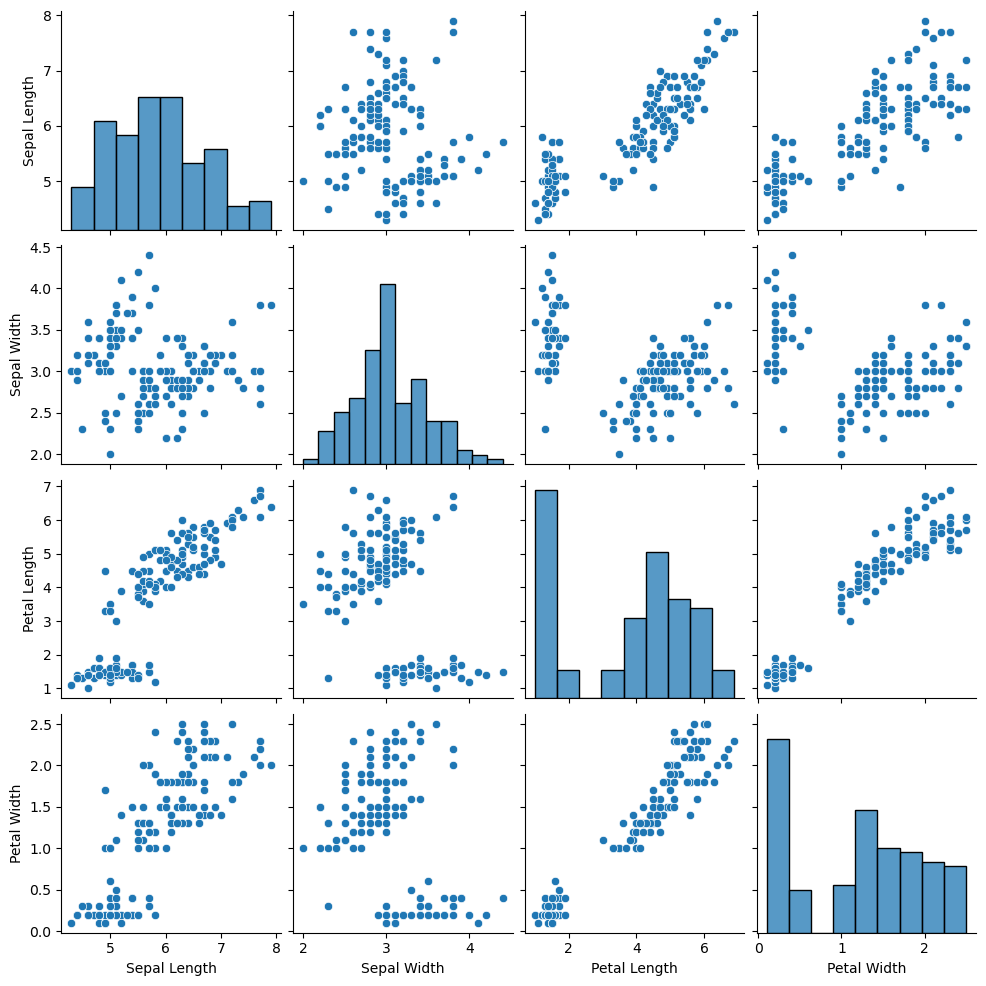

In [4]:
x_train = df.drop("Class", axis=1)
sns.pairplot(x_train)
plt.show()

Fitting the Data with Model

In [5]:
kmeans = KMeans(n_clusters=3,init='random').fit(x_train)

In [6]:
all_df = df.copy(deep = True)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
centroids["cluster"] = "centroid"
all_df['cluster'] = kmeans.labels_.astype("str")
all_df = pd.concat([all_df, centroids])
all_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


Plotting the difference (Before and After)

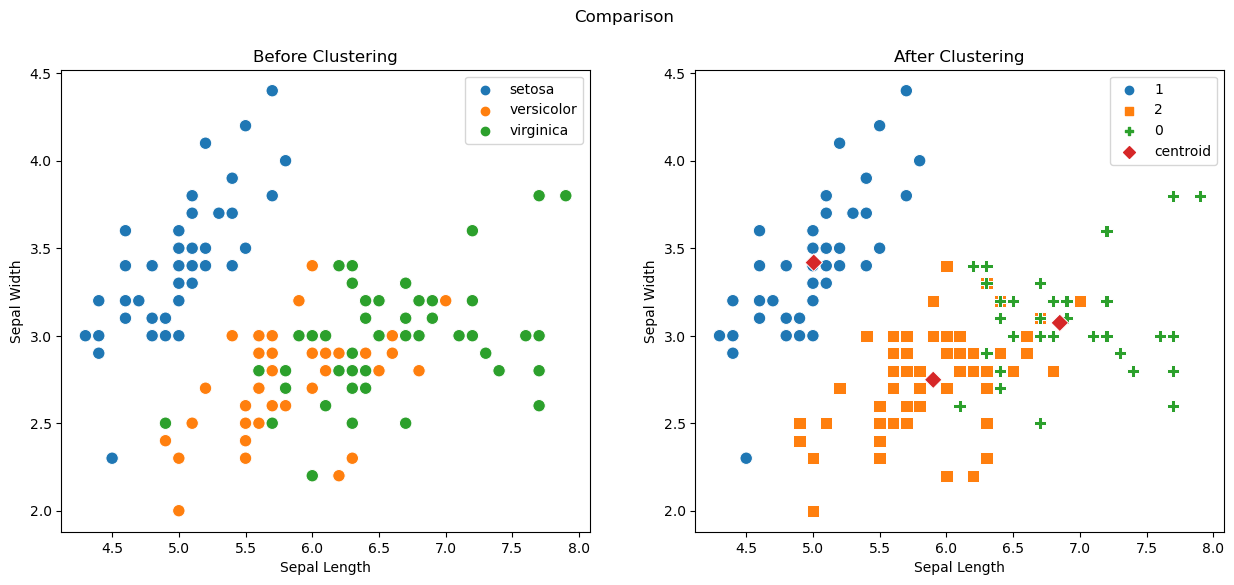

In [7]:
plt.figure(figsize=(15,6))
plt.suptitle("Comparison")
plt.subplot(121)
plt.title("Before Clustering")
sns.scatterplot(data=all_df,x="Sepal Length",y="Sepal Width",hue="Class",s=80)
plt.legend(loc="upper right")

plt.subplot(122)
plt.title("After Clustering")
sns.scatterplot(
    data=all_df,x="Sepal Length",y="Sepal Width",
    hue="cluster",style = "cluster",
    markers="osPD",s=80
)
plt.legend(loc="upper right")

plt.show()

In [8]:
dist_scores=[]
K = np.arange(2,7)

for k in K:
    model = KMeans(n_clusters = k,init = 'random')
    model.fit(x_train)
    dist_scores.append(model.inertia_)

print(dist_scores)


[152.36870647733903, 78.94084142614602, 57.31787321428571, 46.56163015873016, 38.930963049671746]


Elbow Method for finding the value of K

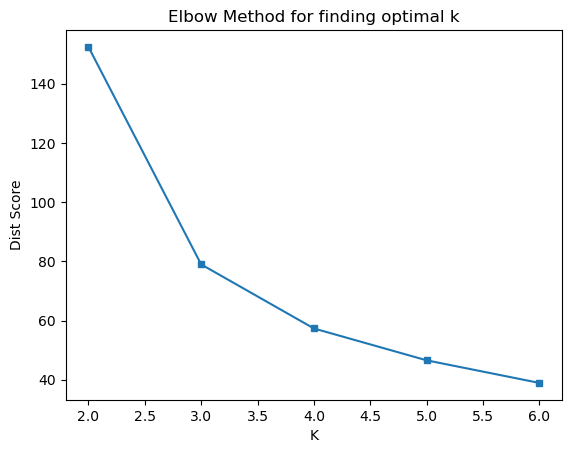

In [9]:
plt.plot(K,dist_scores,'s-',markersize = 5)
plt.xlabel('K')
plt.ylabel('Dist Score')
plt.title('Elbow Method for finding optimal k')
plt.show()

Conclusion:

From the above program the optimal value of 'K' for the Iris dataset is said to be 3 and the program was successfully completed. 
    